c:\Users\user\anaconda3\envs\YoloV5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5  2024-1-31 Python-3.9.18 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


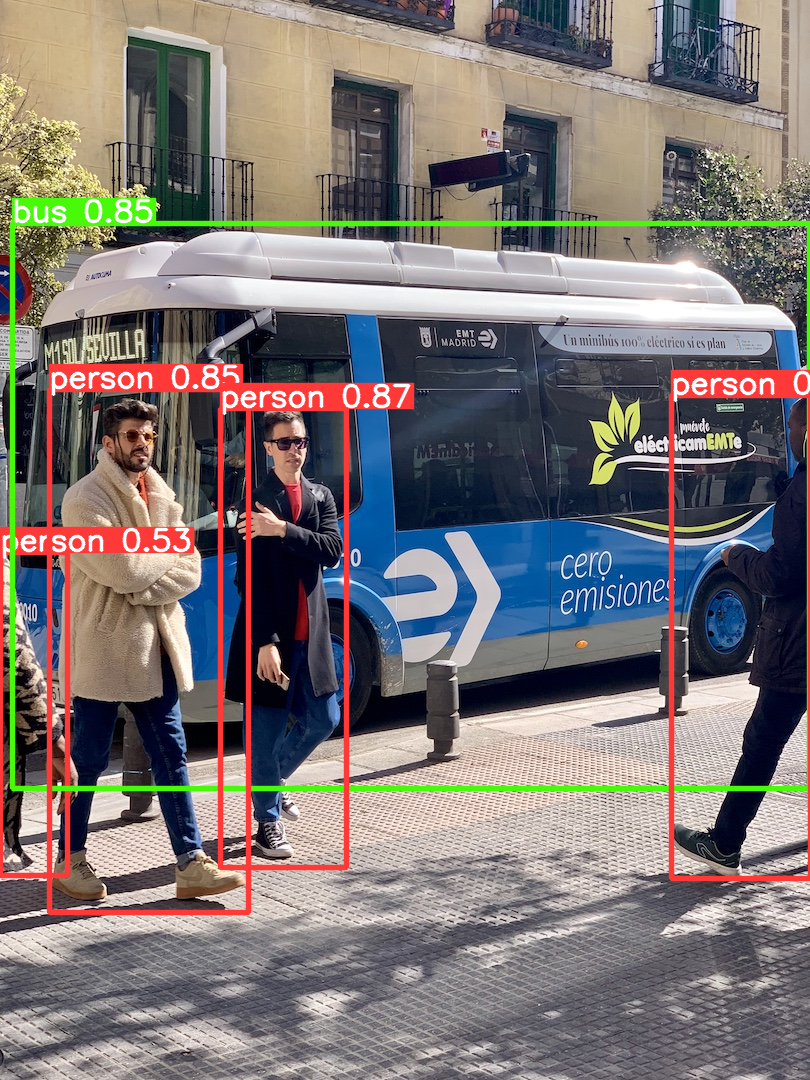

In [1]:
import torch

model = torch.hub.load("../","yolov5s",source = "local")

img = "../data/images/bus.jpg"

results = model(img)

results.show()

In [7]:
import subprocess

# 要執行的命令及參數
command = ["python", "detect.py", "--save-txt"]

# 使用 subprocess 模組執行命令
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# 等待命令執行完成
stdout, stderr = process.communicate()

# 檢查執行結果
if process.returncode == 0:
    print("執行成功！")
    print("輸出：", stdout.decode())
else:
    print("執行失敗！")
    print("錯誤信息：", stderr.decode())



執行成功！
輸出： 


In [16]:
# 開啟標註檔案
with open('./test.txt', 'r') as f:
    lines = f.readlines()

# 設置接近的閾值
threshold = 0.02

# 初始化計數器
x_count_close_boxes = 0
y_count_close_boxes = 0

# 讀取每一行標註
for line in lines:
    # 將每一行標註拆分為不同的數值
    class_label, x_center, y_center, width, height = map(float, line.split())

    # 計算中心座標接近的bounding box數量
    for other_line in lines:
        other_class_label, other_x_center, other_y_center, other_width, other_height = map(float, other_line.split())
        if abs(y_center - other_y_center) <= threshold:
            y_count_close_boxes += 1
            break  # 避免重複計算
        
    for other_line in lines:
        other_class_label, other_x_center, other_y_center, other_width, other_height = map(float, other_line.split())
        if abs(x_center - other_x_center) <= threshold:
            x_count_close_boxes += 1
            break  # 避免重複計算

print("Ycenter座標接近的bounding box數量：", y_count_close_boxes)
print("Xcenter座標接近的bounding box數量：", x_count_close_boxes)

Ycenter座標接近的bounding box數量： 8
Xcenter座標接近的bounding box數量： 8


In [2]:
# 讀取 YOLO 標註的 .txt 檔案
with open("./test.txt", "r") as file:
    lines = file.readlines()

# 儲存 bounding box 的 x,y_center 座標
y_centers = []
x_centers = []

# 解析每一行標註
for line in lines:
    class_label, x_center, y_center, width, height = map(float, line.split())
    x_centers.append(x_center)
    y_centers.append(y_center)

if class_label == 0:
    
    # 將 y_center 座標排序
    y_centers.sort()
    x_centers.sort()

    print(x_centers)

    # 初始化計數器
    x_group_count = 0
    y_group_count = 0

    # 檢查 x_center 座標是否接近彼此的 bounding box
    for i in range(len(x_centers) - 1):
        if abs(x_centers[i] - x_centers[i + 1]) <= 0.02:
            x_group_count += 1


    # 檢查 y_center 座標是否接近彼此的 bounding box
    for i in range(len(y_centers) - 1):
        if abs(y_centers[i] - y_centers[i + 1]) <= 0.02:
            y_group_count += 1

    print("有", x_group_count, "組 bounding box 的 x_center 座標接近。")
    print("有", y_group_count, "組 bounding box 的 y_center 座標接近。")

[0.193359, 0.205078, 0.21875, 0.230469, 0.564453, 0.605469, 0.669922, 0.693359]
有 3 組 bounding box 的 x_center 座標接近。
有 4 組 bounding box 的 y_center 座標接近。
